In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import glob
import os
from pathlib import Path
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from keras.utils import np_utils
from keras.callbacks import Callback, EarlyStopping
from keras.metrics import AUC, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
from tensorflow_addons.metrics import F1Score
from tensorflow.keras import backend as K
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Preparazione Dataset

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df1 = pd.read_csv('/Users/andreaermellino/desktop/DSL.csv')

In [ ]:
df1

,external_id,how_many_ok_urls,how_many_ko_urls,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,...,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc,DATA_RIF
0,05c36523ead36d29924d69e0d34a587f1be95089eeb3deb2,110,9,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
1,208684b1148590745983ae01b5ec3189be03e60a78caed2e,17,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,2017-06-18
2,2bf4058a60bb97c372259cba8a71005c9a07224ec2dc5893,3,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,2017-05-07
3,54de0fb755b15f1b931d7c72390276b4f8c4b0314ea36956,196,25,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-08-06
4,5f52f7ee7f469a3b4a407d3ab1c85dff9ad3d36afc22dc69,3,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330581,e502063f2b024f366c9b746af2e46e9499566042f0805ec5,3,7,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
330582,e7ea82af3c6ac8c132c1707c12028e4d651cdc2de19fdc16,7,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
330583,e95515b8322d0cb1c56898c28ab14ded17d7c9f5e94da59f,35,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,2017-05-07
330584,ed2ba3c23f6dd28dec4875a2b3dfc555ceed4d1e7b7f83e2,35,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-08-06


In [ ]:
df1 = df1.drop_duplicates()
df1

,external_id,how_many_ok_urls,how_many_ko_urls,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,...,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc,DATA_RIF
0,05c36523ead36d29924d69e0d34a587f1be95089eeb3deb2,110,9,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
1,208684b1148590745983ae01b5ec3189be03e60a78caed2e,17,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,2017-06-18
2,2bf4058a60bb97c372259cba8a71005c9a07224ec2dc5893,3,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,2017-05-07
3,54de0fb755b15f1b931d7c72390276b4f8c4b0314ea36956,196,25,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-08-06
4,5f52f7ee7f469a3b4a407d3ab1c85dff9ad3d36afc22dc69,3,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330581,e502063f2b024f366c9b746af2e46e9499566042f0805ec5,3,7,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
330582,e7ea82af3c6ac8c132c1707c12028e4d651cdc2de19fdc16,7,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
330583,e95515b8322d0cb1c56898c28ab14ded17d7c9f5e94da59f,35,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,2017-05-07
330584,ed2ba3c23f6dd28dec4875a2b3dfc555ceed4d1e7b7f83e2,35,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-08-06


In [ ]:
df1.describe()

,how_many_ok_urls,how_many_ko_urls,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,browser_android,...,FLG_MV,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc
count,330578.000000,330578.000000,330578.000000,330578.0,330578.000000,330578.000000,330578.0,330578.000000,330578.000000,330578.0,...,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000
mean,67.935392,12.999289,0.004928,0.0,0.001392,0.000239,0.0,0.969411,0.024031,0.0,...,0.208529,0.793689,0.198613,0.079219,0.865230,0.095714,0.884877,0.001724,0.010778,0.030087
std,152.870888,58.127559,0.070025,0.0,0.037277,0.015457,0.0,0.172201,0.153144,0.0,...,0.406257,0.404657,0.398956,0.270080,0.341478,0.294199,0.319170,0.041488,0.103257,0.170826
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,19.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,64.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,13324.000000,4367.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df1[['CINEMA',
 'CALCIO',
 'SPORT',
 'SKY_FAMIGLIA',
 'FLG_MV',
 'FLG_MYSKYHD',
 'FLG_HD',
 'FLG_MYSKY',
 'FLG_SKY_ON_DEMAND',
 'STB_HD',
 'STB_MYSKYHD',
 'STB_MYSKY',
 'STB_SD']].describe()

,CINEMA,CALCIO,SPORT,SKY_FAMIGLIA,FLG_MV,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD
count,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000,330578.000000
mean,0.755516,0.562218,0.642484,0.703988,0.208529,0.793689,0.198613,0.079219,0.865230,0.095714,0.884877,0.001724,0.010778
std,0.429824,0.496151,0.479307,0.456537,0.406257,0.404657,0.398956,0.270080,0.341478,0.294199,0.319170,0.041488,0.103257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df1[df1['CINEMA'] == 2]
df1[df1['CALCIO'] == 2]
df1[df1['SPORT'] == 2]
df1[df1['SKY_FAMIGLIA'] == 2]

,external_id,how_many_ok_urls,how_many_ko_urls,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,...,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc,DATA_RIF
13374,2392304a510741958f8b342f6ee170c7ed96c3acd89e48f0,28,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-09-03
36448,cf373ee227182531bc5f9bb721b67560125e31d8ad2d5499,532,142,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,2017-08-13
120281,49ca5c264dd0d415222cff7b129fb8bf1bdd4e490f5a0e91,27,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,2017-08-27
178435,4f96fb8b8b03f7a665a3faaf17d0a1e4d1e62527cc6fa1a5,358,5,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
194662,c12c48fe7f48967d1a750d9a58741c78b7e9b20a0752846e,203,21,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,2017-09-03
323107,3862c97f472cc8bb757bd32720d40ddbc230173ee03a6bba,10,1,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-07-23


Le 6 righe in questione hanno valore 2 nelle colonne CINEMA, CALCIO, SPORT, SKY_FAMIGLIA. Essendo 6 righe su 330k possono essere rimosse senza problemi

In [ ]:
df1[df1['CINEMA'] == 2].index

Int64Index([13374, 36448, 120281, 178435, 194662, 323107], dtype='int64')

In [ ]:
df1 = df1.drop(df1[df1['CINEMA'] == 2].index, axis = 'rows')

In [ ]:
df1

,external_id,how_many_ok_urls,how_many_ko_urls,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,...,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc,DATA_RIF
0,05c36523ead36d29924d69e0d34a587f1be95089eeb3deb2,110,9,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
1,208684b1148590745983ae01b5ec3189be03e60a78caed2e,17,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,2017-06-18
2,2bf4058a60bb97c372259cba8a71005c9a07224ec2dc5893,3,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,2017-05-07
3,54de0fb755b15f1b931d7c72390276b4f8c4b0314ea36956,196,25,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-08-06
4,5f52f7ee7f469a3b4a407d3ab1c85dff9ad3d36afc22dc69,3,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330581,e502063f2b024f366c9b746af2e46e9499566042f0805ec5,3,7,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
330582,e7ea82af3c6ac8c132c1707c12028e4d651cdc2de19fdc16,7,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
330583,e95515b8322d0cb1c56898c28ab14ded17d7c9f5e94da59f,35,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,2017-05-07
330584,ed2ba3c23f6dd28dec4875a2b3dfc555ceed4d1e7b7f83e2,35,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-08-06


In [ ]:
df1["DATA_RIF"] = pd.to_datetime(df1["DATA_RIF"])
df1 = df1.sort_values(by="DATA_RIF")

df1= df1.drop(columns=['admants_appletv',
 'admants_chili',
 'admants_comparatoriprezzo',
 'admants_disdettecontrattuali',
 'admants_googleplayfilm',
 'admants_mediaset',
 'admants_netflix',
 'admants_novita',
 'admants_offerte',
 'admants_skyarte',
 'admants_skycinema',
 'admants_skycompetitors',
 'admants_skyfamiglia',
 'admants_skygastronomia',
 'admants_skyinternet',
 'admants_skyinternetfamiglia',
 'admants_skymusica',
 'admants_skynews',
 'admants_skyonline',
 'admants_skysport',
 'admants_skysportcalcio',
 'admants_skysportformula1',
 'admants_skytecnologia',
 'admants_skytelevisione'])

In [ ]:
id_index = pd.DataFrame(df1['external_id'])
id_index['index'] = df1.index
id_index

,external_id,index
0,05c36523ead36d29924d69e0d34a587f1be95089eeb3deb2,0
187144,a73c9a3cf3aca94dda551e71217f250af17f3f27c5fa4ca4,187144
187145,ae5982f6e51e11bee26265ecf68957e042acd9726dbf21c4,187145
187146,e9d6d78b5818fb8a74befc4a28c2907e4b5cd243b3589c56,187146
187150,5e4abb8e425e23b40273df43a105d32d9d51188ce22edbad,187150
...,...,...
131276,edd6b6601cf6ccbe5fbbb49eddb8c9e69df178140f131637,131276
26982,620fb96814bd65893d263d2b7b8b2b0be96693fc453aa849,26982
77779,40fd8db0c451c4b3b236cf9ad12e52e4fbff66bba722677a,77779
84602,4f607e9ce0ecddd46b1fec6819a1cc40f841d1987ed302c9,84602


In [ ]:
df1 = df1.drop(columns=['external_id', 'DATA_RIF'])

# Addestramento Modelli

In [ ]:
count_class_0, count_class_1 = df1.Pdisc.value_counts()
df_class_0 = df1[df1['Pdisc'] == 0]
df_class_1 = df1[df1['Pdisc'] == 1]
count_class_0, count_class_1

(320626, 9946)

La classe è sbilanciata, i valori 1 sono solo il 3% del dataset.
Provando ad addestrare un modello utilizzando solamente la tecnica di campionamento stratificato si ottengono risultati scadenti

In [ ]:
X = df1.drop('Pdisc', axis = 'columns')
y = df1['Pdisc']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [ ]:
# Neural Network

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(75,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
print("Classification report: \n", classification_report(y_test, y_preds))

Epoch 1/10
7232/7232 [==============================] - 9s 1ms/step - loss: 0.1794 - accuracy: 0.9637
Epoch 2/10
7232/7232 [==============================] - 6s 879us/step - loss: 0.1283 - accuracy: 0.9695
Epoch 3/10
7232/7232 [==============================] - 6s 832us/step - loss: 0.1263 - accuracy: 0.9696
Epoch 4/10
7232/7232 [==============================] - 7s 968us/step - loss: 0.1246 - accuracy: 0.9697
Epoch 5/10
7232/7232 [==============================] - 7s 901us/step - loss: 0.1240 - accuracy: 0.9697
Epoch 6/10
7232/7232 [==============================] - 7s 950us/step - loss: 0.1233 - accuracy: 0.9698
Epoch 7/10
7232/7232 [==============================] - 6s 853us/step - loss: 0.1225 - accuracy: 0.9698
Epoch 8/10
7232/7232 [==============================] - 7s 1ms/step - loss: 0.1220 - accuracy: 0.9698
Epoch 9/10
7232/7232 [==============================] - 6s 846us/step - loss: 0.1216 - accuracy: 0.9698
Epoch 10/10
3100/3100 [==============================] - 2s 589us/st

Com'è possibile notare, il modello ha le performance di una ZeroRule (predicta sempre 0)

## Primo approccio: RANDOM UNDERSAMPLING

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)
df_test_under.shape

print('Random under-sampling:')
print(df_test_under.Pdisc.value_counts())

Random under-sampling:
0    9946
1    9946
Name: Pdisc, dtype: int64


In [ ]:
X = df_test_under.drop('Pdisc', axis = 'columns')
y = df_test_under['Pdisc']

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15,stratify=y)

### Neural Network

In [ ]:
# Early Stopping (evita overfitting)
custom_early_stopping = EarlyStopping(
    monitor='accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(75,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC()])

folds = StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)#istanzio il k fold stratificato per ovviare l'overfitting

contatore = 0

best_under_nn = 0
best_auc = 0

for train_index, test_index in folds.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train, epochs=100, callbacks = [custom_early_stopping], verbose = 0)
    y_proba = model.predict(X_test)
    y_preds = np.round(y_proba)
    contatore = contatore + 1
    metrics = model.evaluate(X_test, y_test)
    if metrics[4] > best_auc :
        best_auc = metrics[4]
        best_under_nn = model
    print('Report modello ', contatore, ':\n', classification_report(y_test, y_preds))

63/63 [==============================] - 0s 961us/step - loss: 0.6019 - accuracy: 0.6729 - precision_1: 0.6533 - recall_1: 0.7367 - auc_1: 0.7457      
Report modello  1 :
               precision    recall  f1-score   support

           0       0.70      0.61      0.65       995
           1       0.65      0.74      0.69       995

    accuracy                           0.67      1990
   macro avg       0.68      0.67      0.67      1990
weighted avg       0.68      0.67      0.67      1990

63/63 [==============================] - 0s 944us/step - loss: 0.6149 - accuracy: 0.6668 - precision_1: 0.6740 - recall_1: 0.6462 - auc_1: 0.7258     
Report modello  2 :
               precision    recall  f1-score   support

           0       0.66      0.69      0.67       995
           1       0.67      0.65      0.66       995

    accuracy                           0.67      1990
   macro avg       0.67      0.67      0.67      1990
weighted avg       0.67      0.67      0.67      1990

6

## Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators = 72,max_depth = 20, n_jobs=-1, random_state = 0)#istanzio il modello 

folds = StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)#istanzio il k fold stratificato per ovviare l'overfitting

scores = [] #istanzio la lista degli score

contatore = 0


for train_index, test_index in folds.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    contatore = contatore + 1
    print('Report modello ', contatore, ':\n', classification_report(y_test, predictions))
    print('AUC:', roc_auc_score(y_test, pd.DataFrame(model.predict_proba(X_test))[1].to_list()), '\n\n')


Report modello  1 :
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       995
           1       0.72      0.64      0.68       995

    accuracy                           0.69      1990
   macro avg       0.70      0.69      0.69      1990
weighted avg       0.70      0.69      0.69      1990

AUC: 0.7518789929547233 


Report modello  2 :
               precision    recall  f1-score   support

           0       0.64      0.73      0.68       995
           1       0.69      0.59      0.63       995

    accuracy                           0.66      1990
   macro avg       0.66      0.66      0.66      1990
weighted avg       0.66      0.66      0.66      1990

AUC: 0.7260372212822908 


Report modello  3 :
               precision    recall  f1-score   support

           0       0.65      0.77      0.71       995
           1       0.72      0.59      0.65       994

    accuracy                           0.68      1989
   macro av

## Secondo approccio: RANDOM OVERSAMPLING

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

print('Random over-sampling:')
print(df_test_over.Pdisc.value_counts())

Random over-sampling:
0    320626
1    320626
Name: Pdisc, dtype: int64


In [ ]:
X = df_test_over.drop('Pdisc', axis = 'columns')
y = df_test_over['Pdisc']

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15,stratify=y)

## Neural Network

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(75,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC()])

folds = StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)#istanzio il k fold stratificato per ovviare l'overfitting

contatore = 0

for train_index, test_index in folds.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train, epochs=100, callbacks = [custom_early_stopping], verbose = 0)
    y_proba = model.predict(X_test)
    y_preds = np.round(y_proba)
    contatore = contatore + 1
    metrics = model.evaluate(X_test, y_test)
    print('Report modello ', contatore, ':\n', classification_report(y_test, y_preds))

2004/2004 [==============================] - 2s 848us/step - loss: 0.5531 - accuracy: 0.7078 - precision_3: 0.7630 - recall_3: 0.6029 - auc_3: 0.7853
Report modello  1 :
               precision    recall  f1-score   support

           0       0.67      0.81      0.74     32063
           1       0.76      0.60      0.67     32063

    accuracy                           0.71     64126
   macro avg       0.72      0.71      0.70     64126
weighted avg       0.72      0.71      0.70     64126

2004/2004 [==============================] - 2s 815us/step - loss: 0.5507 - accuracy: 0.7134 - precision_3: 0.7533 - recall_3: 0.6347 - auc_3: 0.7882
Report modello  2 :
               precision    recall  f1-score   support

           0       0.68      0.79      0.73     32063
           1       0.75      0.63      0.69     32063

    accuracy                           0.71     64126
   macro avg       0.72      0.71      0.71     64126
weighted avg       0.72      0.71      0.71     64126

2004

## Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators = 72,max_depth = 20, n_jobs=-1, random_state = 0)#istanzio il modello 

folds = StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)#istanzio il k fold stratificato per ovviare l'overfitting

contatore = 0

best_rf_over_prec = 0
best_rf_over_rec = 0
best_rf_over_f1 = 0
best_rf_over_auc = 0

best_prec = 0
best_rec = 0
best_f1 = 0
best_auc = 0

best_X = 0
best_y = 0

for train_index, test_index in folds.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    contatore = contatore + 1
    if precision_score(y_test, predictions) > best_prec :
        best_rf_over_prec = model
    if recall_score(y_test, predictions) > best_rec :
        best_rf_over_rec = model
    if f1_score(y_test, predictions) > best_f1 :
        best_rf_over_f1 = model
    if roc_auc_score(y_test, pd.DataFrame(model.predict_proba(X_test))[1].to_list()) > best_auc :
        best_rf_over_auc = model
        best_X = X_test
        best_y = y_test
    print('Report modello ', contatore, ':\n', classification_report(y_test, predictions))
    print('AUC:', roc_auc_score(y_test, pd.DataFrame(model.predict_proba(X_test))[1].to_list()), '\n\n')

Report modello  1 :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     32063
           1       0.95      0.94      0.95     32063

    accuracy                           0.95     64126
   macro avg       0.95      0.95      0.95     64126
weighted avg       0.95      0.95      0.95     64126

AUC: 0.9867460099540544 


Report modello  2 :
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     32063
           1       0.95      0.93      0.94     32063

    accuracy                           0.94     64126
   macro avg       0.94      0.94      0.94     64126
weighted avg       0.94      0.94      0.94     64126

AUC: 0.9866763290263826 


Report modello  3 :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     32063
           1       0.95      0.94      0.94     32062

    accuracy                           0.95     64125
   macro av

## Terzo approccio: SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0    320626
1    320626
Name: Pdisc, dtype: int64

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=15,stratify=y_sm)

## Neural Network

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(75,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC()])

folds = StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)#istanzio il k fold stratificato per ovviare l'overfitting

contatore = 0

for train_index, test_index in folds.split(X_sm, y_sm):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_sm.iloc[train_index], X_sm.iloc[test_index]
    y_train, y_test = y_sm.iloc[train_index], y_sm.iloc[test_index]
    model.fit(X_train, y_train, epochs=100, callbacks = [custom_early_stopping], verbose = 0)
    y_proba = model.predict(X_test)
    y_preds = np.round(y_proba)
    contatore = contatore + 1
    metrics = model.evaluate(X_test, y_test)
    print('Report modello ', contatore, ':\n', classification_report(y_test, y_preds))

2004/2004 [==============================] - 2s 807us/step - loss: 0.5536 - accuracy: 0.7092 - precision_4: 0.7471 - recall_4: 0.6324 - auc_4: 0.7849
Report modello  1 :
               precision    recall  f1-score   support

           0       0.68      0.79      0.73     32063
           1       0.75      0.63      0.68     32063

    accuracy                           0.71     64126
   macro avg       0.71      0.71      0.71     64126
weighted avg       0.71      0.71      0.71     64126

2004/2004 [==============================] - 2s 810us/step - loss: 0.5513 - accuracy: 0.7123 - precision_4: 0.7502 - recall_4: 0.6366 - auc_4: 0.7872
Report modello  2 :
               precision    recall  f1-score   support

           0       0.68      0.79      0.73     32063
           1       0.75      0.64      0.69     32063

    accuracy                           0.71     64126
   macro avg       0.72      0.71      0.71     64126
weighted avg       0.72      0.71      0.71     64126

2004

## Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators = 72,max_depth = 20, n_jobs=-1, random_state = 0)#istanzio il modello 

folds = StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)#istanzio il k fold stratificato per ovviare l'overfitting

contatore = 0

best_rf_smote_prec = 0
best_rf_smote_rec = 0
best_rf_smote_f1 = 0
best_rf_smote_auc = 0

best_prec = 0
best_rec = 0
best_f1 = 0
best_auc = 0

for train_index, test_index in folds.split(X_sm, y_sm):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_sm.iloc[train_index], X_sm.iloc[test_index]
    y_train, y_test = y_sm.iloc[train_index], y_sm.iloc[test_index]
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    contatore = contatore + 1
    if precision_score(y_test, predictions) > best_prec :
        best_rf_smote_prec = model
    if recall_score(y_test, predictions) > best_rec :
        best_rf_smote_rec = model
    if f1_score(y_test, predictions) > best_f1 :
        best_rf_smote_f1 = model
    if roc_auc_score(y_test, pd.DataFrame(model.predict_proba(X_test))[1].to_list()) > best_auc :
        best_rf_smote_auc = model
    print('Report modello ', contatore, ':\n', classification_report(y_test, predictions))
    print('AUC:', roc_auc_score(y_test, pd.DataFrame(model.predict_proba(X_test))[1].to_list()), '\n\n')

Report modello  1 :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     32063
           1       0.95      0.94      0.95     32063

    accuracy                           0.95     64126
   macro avg       0.95      0.95      0.95     64126
weighted avg       0.95      0.95      0.95     64126

AUC: 0.9867460099540544 


Report modello  2 :
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     32063
           1       0.95      0.93      0.94     32063

    accuracy                           0.94     64126
   macro avg       0.94      0.94      0.94     64126
weighted avg       0.94      0.94      0.94     64126

AUC: 0.9866763290263826 


Report modello  3 :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     32063
           1       0.95      0.94      0.94     32062

    accuracy                           0.95     64125
   macro av

# Feature Selection

In [ ]:
X = df1.drop('Pdisc', axis = 'columns')
y = df1['Pdisc']

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(75,'Score'))  #print 10 best features

                                 Specs        Score
0                     how_many_ok_urls  2960.018427
71                              STB_HD  2700.251731
64                               SPORT  1400.260803
55                 categories_shopping  1338.775253
65                        SKY_FAMIGLIA  1007.445180
54                  categories_science   982.586361
1                     how_many_ko_urls   979.685072
66                              FLG_MV   933.097267
67                         FLG_MYSKYHD   915.857791
62                              CINEMA   855.605119
63                              CALCIO   661.140651
59   categories_technologyandcomputing   505.378480
70                   FLG_SKY_ON_DEMAND   489.173976
72                         STB_MYSKYHD   380.814699
61            categories_uncategorized   341.148788
57                   categories_sports   281.930905
69                           FLG_MYSKY   228.713395
44             categories_foodanddrink   190.529817
68          

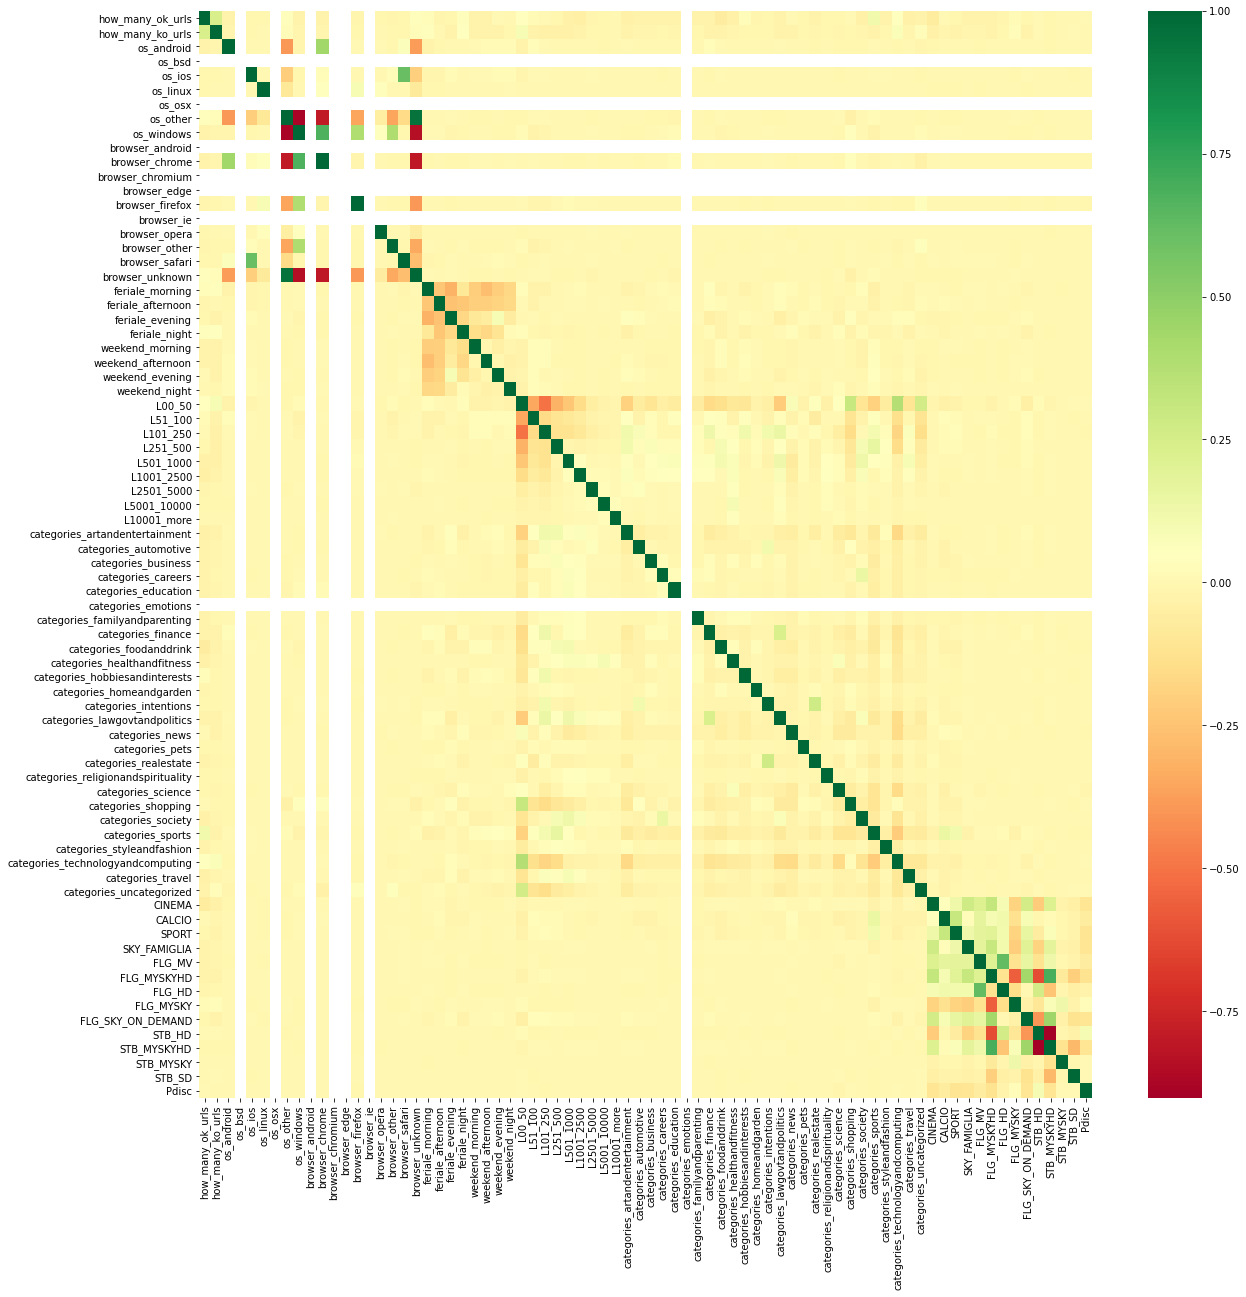

In [ ]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),cmap="RdYlGn")

In [ ]:
df_fs = pd.DataFrame()

In [ ]:
df_fs['how_many_ok_urls'] = df1['how_many_ok_urls']
df_fs[ 'STB_HD'] = df1['STB_HD']
df_fs['SPORT'] = df1['SPORT']
df_fs['categories_shopping'] = df1['categories_shopping']

In [ ]:
df_fs['SKY_FAMIGLIA'] = df1['SKY_FAMIGLIA']
df_fs['categories_science'] = df1['categories_science']
df_fs['how_many_ko_urls'] = df1['how_many_ko_urls']
df_fs['FLG_MV'] = df1['FLG_MV']
df_fs['FLG_MYSKYHD'] = df1['FLG_MYSKYHD']

In [ ]:
df_fs['CINEMA'] = df1['CINEMA']
df_fs['CALCIO'] = df1['CALCIO']
df_fs['categories_technologyandcomputing'] = df1['categories_technologyandcomputing']
df_fs['STB_MYSKYHD'] = df1['STB_MYSKYHD']
df_fs['categories_uncategorized'] = df1['categories_uncategorized']

In [ ]:
df_fs['categories_sports'] = df1['categories_sports']
df_fs['FLG_MYSKY'] = df1['FLG_MYSKY']
df_fs['categories_foodanddrink'] = df1['categories_foodanddrink']
df_fs['FLG_HD'] = df1['FLG_HD']
df_fs['categories_news'] = df1['categories_news']
df_fs['FLG_SKY_ON_DEMAND'] = df1['FLG_SKY_ON_DEMAND']
df_fs['Pdisc'] = df1['Pdisc']

In [ ]:
df_fs.shape

(330572, 21)

In [ ]:
count_class_0, count_class_1 = df_fs.Pdisc.value_counts()
df_class_0 = df_fs[df_fs['Pdisc'] == 0]
df_class_1 = df_fs[df_fs['Pdisc'] == 1]
count_class_0, count_class_1

(320626, 9946)

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

print('Random over-sampling:')
print(df_test_over.Pdisc.value_counts())

Random over-sampling:
0    320626
1    320626
Name: Pdisc, dtype: int64


In [ ]:
X = df_test_over.drop('Pdisc', axis = 'columns')
y = df_test_over['Pdisc']

In [ ]:
model = RandomForestClassifier(n_estimators = 72,max_depth = 20, n_jobs=-1, random_state = 0)#istanzio il modello 

folds = StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)#istanzio il k fold stratificato per ovviare l'overfitting

contatore = 0


for train_index, test_index in folds.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    contatore = contatore + 1
    print('Report modello ', contatore, ':\n', classification_report(y_test, predictions))
    print('AUC:', roc_auc_score(y_test, pd.DataFrame(model.predict_proba(X_test))[1].to_list()), '\n\n')

Report modello  1 :
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     32063
           1       0.94      0.87      0.90     32063

    accuracy                           0.91     64126
   macro avg       0.91      0.91      0.91     64126
weighted avg       0.91      0.91      0.91     64126

AUC: 0.970220477275927 


Report modello  2 :
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     32063
           1       0.94      0.87      0.90     32063

    accuracy                           0.91     64126
   macro avg       0.91      0.91      0.91     64126
weighted avg       0.91      0.91      0.91     64126

AUC: 0.9706774311317895 


Report modello  3 :
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     32063
           1       0.94      0.87      0.90     32062

    accuracy                           0.91     64125
   macro avg

# Propensity

In [ ]:
RF = best_rf_over_auc

predictions = RF.predict(best_X)

print('Report modello :\n', classification_report(best_y, predictions))

Report modello :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     32062
           1       0.95      0.94      0.94     32063

    accuracy                           0.95     64125
   macro avg       0.95      0.95      0.95     64125
weighted avg       0.95      0.95      0.95     64125



Non c'è il seed permanente, quindi ogni volta che si fa k-fold vengono generati 10 train diversi (prima il train numero 8 portava a 0.96 di F-Measure e invece ora è 0.94).

Addestro comunque il modello per fare dei test

In [ ]:
probability = RF.predict_proba(best_X)

In [ ]:
df = pd.DataFrame(best_y)

In [ ]:
index = df.index
probability = pd.DataFrame(probability)
probability = pd.DataFrame(probability[1])
probability['index'] = index
df = df.merge(probability, how='inner', left_index=True, right_on='index')

In [ ]:
df = df.drop('index', axis='columns')

In [ ]:
df.columns = ['Pdisc', 'Propensity']

In [ ]:
df.sort_values(by='Propensity', ascending=False)

In [ ]:
df.index.unique()

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            63797, 63803, 63814, 63858, 63871, 63924, 63969, 64027, 64042,
            64104],
           dtype='int64', length=64125)

In [ ]:
index_nodup = df.index.drop_duplicates()

In [ ]:
df_nodup = df.iloc[index_nodup]
df_nodup = df_nodup.sort_values(by='Propensity', ascending=False)

In [ ]:
df_decili = {'100%': df_nodup[0:6412], '90%': df_nodup[6413:12825], '80%': df_nodup[12826:19238], '70%': df_nodup[19239:25651], 
             '60%': df_nodup[25652:32064], '50%': df_nodup[32065:38477], '40%': df_nodup[38478:44890], '30%': df_nodup[44891:51303], 
             '20%': df_nodup[51304:57716], '10%': df_nodup[57717:]}

In [ ]:
for dec in df_decili:
    print('Decile', dec, ': \n')
    print('Propensity to churn media:', mean(df_decili[dec]['Propensity']), '\n')
    perc_0 = 0
    perc_1 = 0
    try:
        perc_1 = df_decili[dec]['Pdisc'].value_counts()[1]/len(df_decili[dec]['Pdisc']) * 100
    except:
        perc_1 = 0
    try:
        perc_0 = df_decili[dec]['Pdisc'].value_counts()[0]/len(df_decili[dec]['Pdisc']) * 100
    except:
        perc_0 = 0
    
    print('Percentuale di churners:', perc_1)
    print('Percentuale di non churners:', perc_0)
    print('\n------------------------------------------------\n')

Decile 100% : 

Propensity to churn media: 0.9267377148613825 

Percentuale di churners: 99.81285090455397
Percentuale di non churners: 0.18714909544603867

------------------------------------------------

Decile 90% : 

Propensity to churn media: 0.893022181514547 

Percentuale di churners: 98.90829694323145
Percentuale di non churners: 1.0917030567685588

------------------------------------------------

Decile 80% : 

Propensity to churn media: 0.8385736450841161 

Percentuale di churners: 97.87897691827823
Percentuale di non churners: 2.1210230817217717

------------------------------------------------

Decile 70% : 

Propensity to churn media: 0.7369844359259867 

Percentuale di churners: 93.4341859014348
Percentuale di non churners: 6.565814098565189

------------------------------------------------

Decile 60% : 

Propensity to churn media: 0.5906085326647835 

Percentuale di churners: 82.7666874610106
Percentuale di non churners: 17.233312538989395

---------------------------